In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "experiment"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from collections import deque

mpl.rcParams['font.family'] = ['serif']
mpl.rcParams['font.serif'] = ['Times New Roman']
plt.rcParams['font.size'] = 12

%matplotlib inline
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

In [3]:
import serial
import pandas as pd
import time 

class Finger():
    def __init__(self,PATH = '/dev/ttyUSB0'):
        self.ser = serial.Serial(PATH, 57600)
        self.ser.flushInput()
        self.data = self.ser.readline().decode()
    def GetData(self):
        self.ser.flushInput()
        # self.data = self.ser.readline().decode()
        self.ser.readlines(1000)
        self.data = self.ser.readline().decode('utf-8')
        self.data = self.data.split(',')
        self.data = list(map(float, self.data))

        return self.data
    def close():
        self.ser.close()


In [4]:
import FTReading


class FTSensor():
    def __init__(self,IP = '192.168.1.101'):
        self.FTSensor = FTReading.FTReading('192.168.1.101')
        self.FTSensor.InitFT()
        self.data = self.FTSensor.GetReading(100)

    def GetData(self):
        self.data = self.FTSensor.GetReading(100)

        return self.data

In [5]:
_root_path = '/home/yang/ml/DeepClawDev'
sys.path.append(_root_path)
os.chdir(_root_path)
print('work_dir: ', _root_path)

work_dir:  /home/yang/ml/DeepClawDev


In [6]:
from deepclaw.driver.arms.URController_rtde import URController
ur10 = URController(_root_path + '/configs/TactileSensor/ur10e.yaml')

In [7]:
def plot_sensor(fig,ax,data):
    i = 0
    x = np.arange(0,200,1)
    
    y1 = data[0]
    y2 = data[1]

    if ax.lines :
        for line in ax.lines:
            line.set_xdata(x)       
            if i == 0:
                line.set_ydata(y1)
                line.set_label('$Prediction$')
            elif i == 1:
                line.set_ydata(y2)
                line.set_label('$GroundTruth$')
            i += 1
            ax.legend(loc=2,fontsize=10)
    else:
        ax.plot(x, y1,'r',label='$Prediction$')
        ax.plot(x, y2,'g',label='$GroundTruth$')
        ax.legend(loc=2,fontsize=10)
#     ax.relim()
#     ax.autoscale_view()
#     plt.gca()
    fig.subplots_adjust(bottom=0.2)
    fig.canvas.draw()
    fig.canvas.flush_events()

In [8]:
def plot_sensor_scatter(fig,ax,data):
    i = 0
    y1 = data[0]
    y2 = data[1]

    x1 = [5]
    x2 = [6]
    if ax.lines :
        for line in ax.lines:
            if i == 0:
                line.set_ydata(y1)       
                line.set_xdata(x1)
                line.set_label('$Prediction$')
            elif i == 1:
                line.set_ydata(y2)       
                line.set_xdata(x2)
                line.set_label('$GroundTruth$')
            i += 1
            ax.legend(loc=2,fontsize=10)
    else:
        ax.plot(x1, y1,'ro', linewidth=0, markersize=15,label='$Prediction$')
        ax.plot(x2, y2,'go', linewidth=0, markersize=15,label='$GroundTruth$')
        ax.legend(loc=2,fontsize=10)
#     ax.relim()
#     ax.autoscale_view()
#     plt.gca()
#     fig.subplots_adjust(bottom=0.2)
    fig.canvas.draw()
    fig.canvas.flush_events()

# initialize

In [9]:
import joblib
my_model_loaded_position_z = joblib.load("/home/yang/ml/model/final_model_forest_position_z.pkl") # DIFF


In [10]:
finger = Finger(PATH = '/dev/ttyUSB0')
FTSensor = FTSensor(IP = '192.168.1.101')
data = finger.GetData()


# plot

In [11]:
import time
def move():
    Y = [0.435350,0.43500,0.434910,0.434710,0.435140,0.435400,0.43600,0.43649,0.43744,0.437520,0.43723]
    CPosition = ur10.get_state()['TCP_Pose']
    HomePosition = CPosition.copy()
    HomePosition[:3] = [-0.838260,0.429,0.152]
    GPosition = HomePosition.copy()
    ur10.move_p(GPosition,0.01,0.01)
    p_index = 0

    while 1:
        GPosition[2] = GPosition[2]-0.002
        GPosition[1] = Y[p_index]
        ur10.move_p(GPosition,0.01,0.01)
        p_index = p_index +1
        if p_index == 11:
            p_index = 0
            break
    GPosition = HomePosition.copy()
    ur10.move_p(GPosition,0.01,0.01)

In [12]:
import pandas as pd
import os

%matplotlib auto
def aa():
    
    fig, ax1= plt.subplots(1,1, figsize = (10,5))
    ax1.set_ylim(0,12)

    Ax,Ay = deque(np.zeros(200)),deque(np.zeros(200))

    ax1.set_xlabel('time')
    ax1.set_ylabel('Contact Point / N')


    ax1.set_title('Contact Point Estimation')


    fig.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9,
                    wspace=0.3, hspace=0.3)

    while 1:
    #     some_data = data.sample(n=1,replace = True)
    #     x_data = some_data.drop(['p_index','m_index','Fx','Fy','Fz','Tx','Ty','Tz'], axis=1)


        if FTSensor.GetData()[1] > 0.5:

            CPosition = ur10.get_state()['TCP_Pose']
            Ax.popleft(); Ax.append(my_model_loaded_position_z.predict([finger.GetData()])[0])
            Ay.popleft(); Ay.append((0.150 - CPosition[2])/0.002)
        else:
            Ax.popleft(); Ax.append(0)
            Ay.popleft(); Ay.append(0)

        data_plot_1 = [np.array(Ax),np.array(Ay)]


        plot_sensor(fig,ax1,data_plot_1)

        plt.ion()


Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


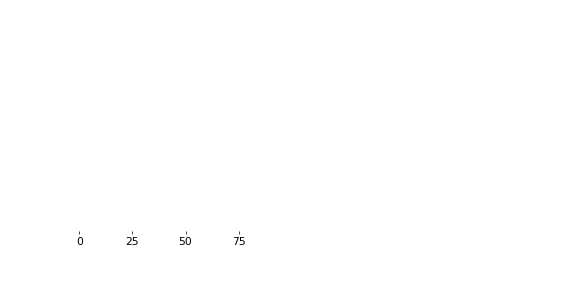

In [13]:
import _thread

try:
   _thread.start_new_thread( aa, ( ) )
   _thread.start_new_thread( move, ( ) )
except:
   print ("Error: 无法启动线程")

# point_detection

In [13]:
%matplotlib inline
import matplotlib.image as mpimg
filename = 'finger_4.jpg'
images_path = os.path.join(PROJECT_ROOT_DIR, "images", "end_to_end_project")

finger_img = mpimg.imread('/home/yang/ml/images/experiment/finger_4.jpg')

/home/yang/ml/my_env/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


KeyboardInterrupt: 

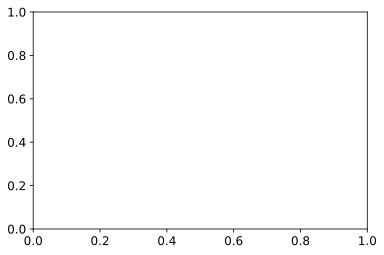

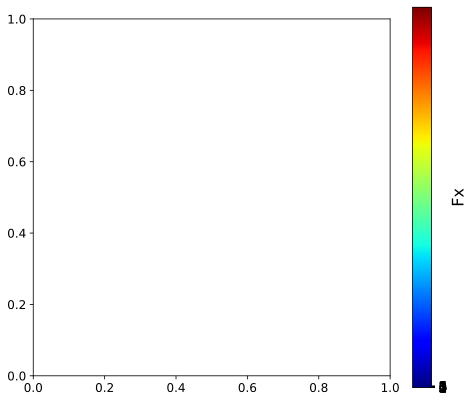

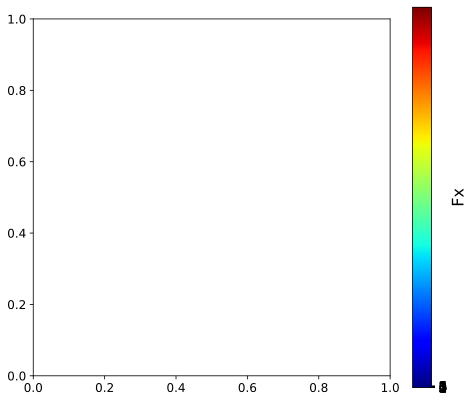

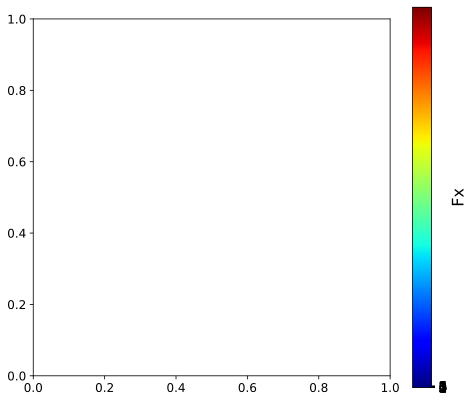

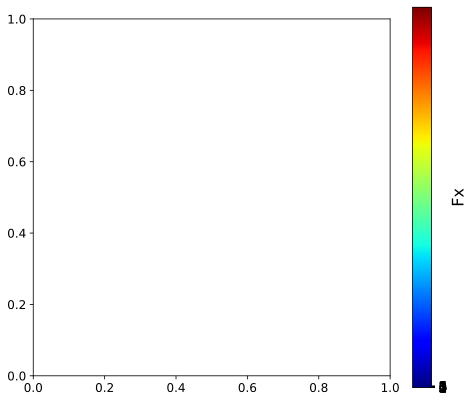

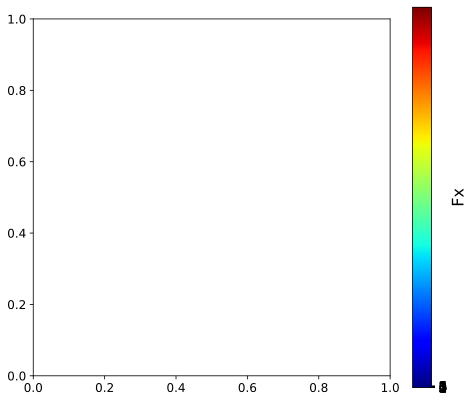

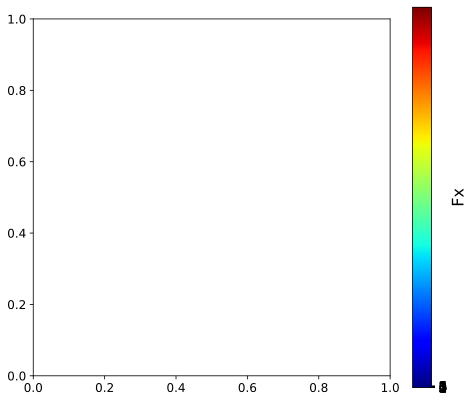

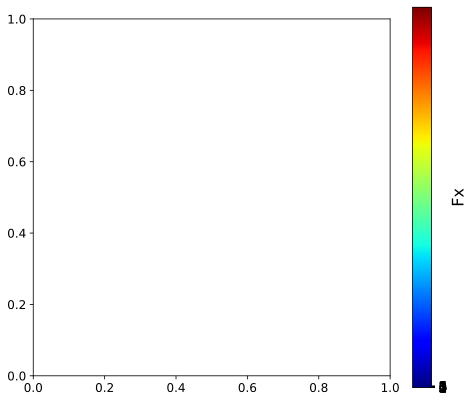

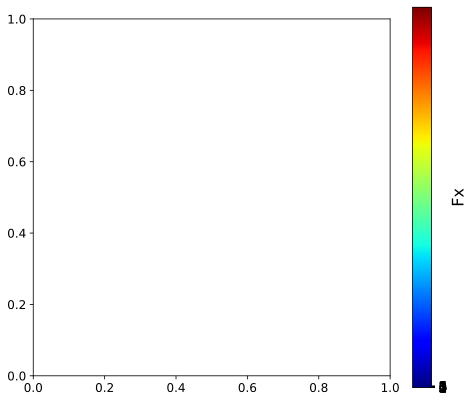

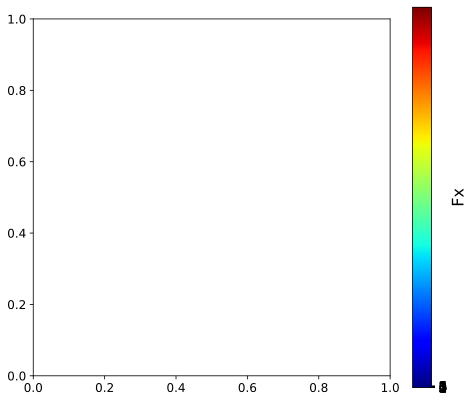

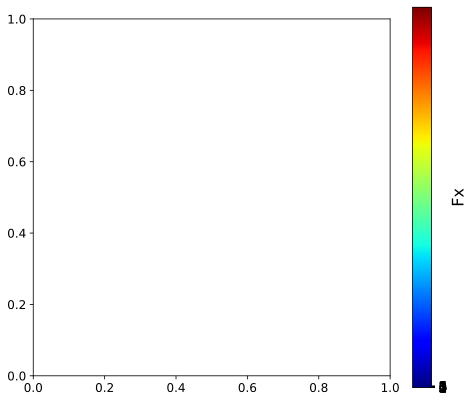

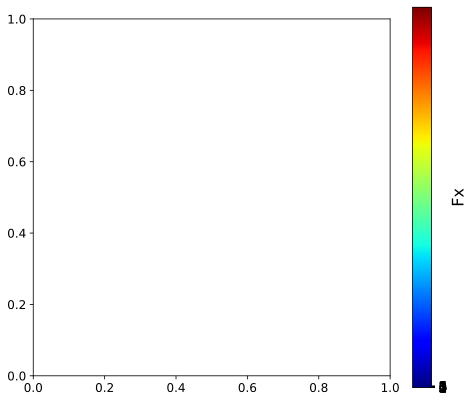

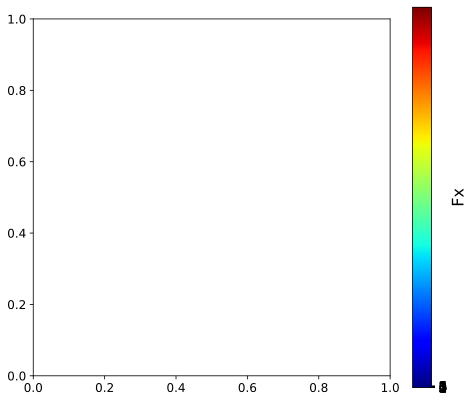

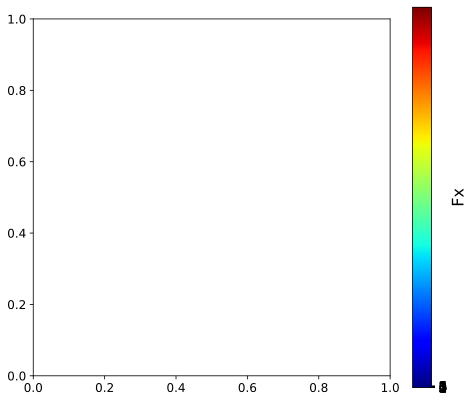

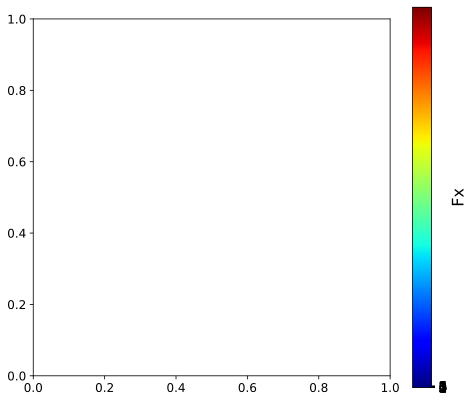

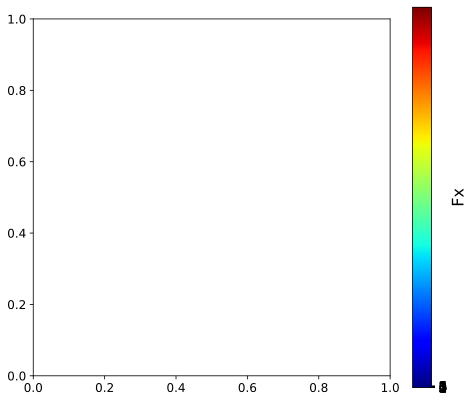

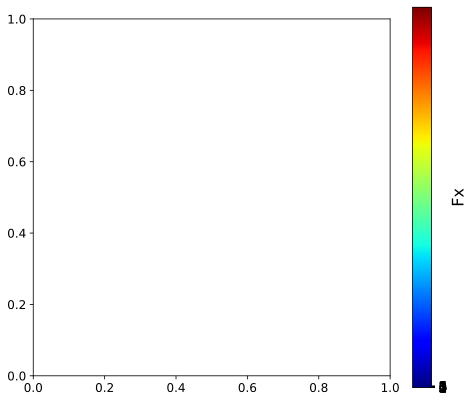

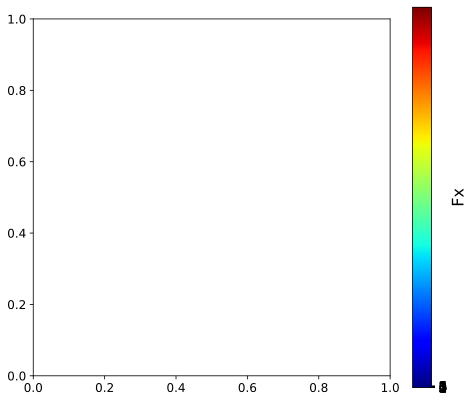

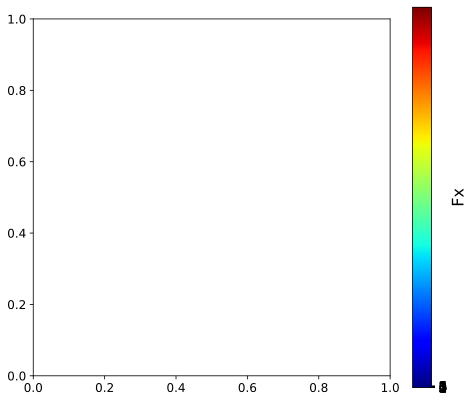

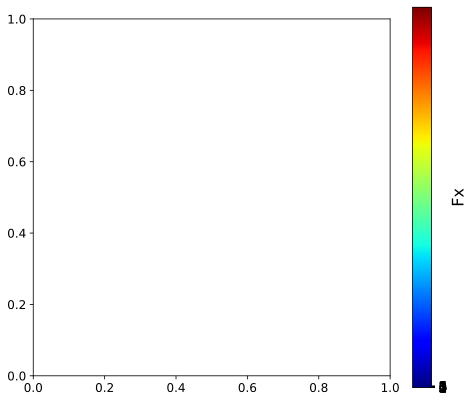

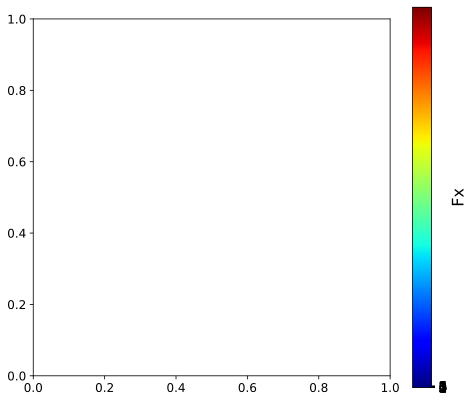

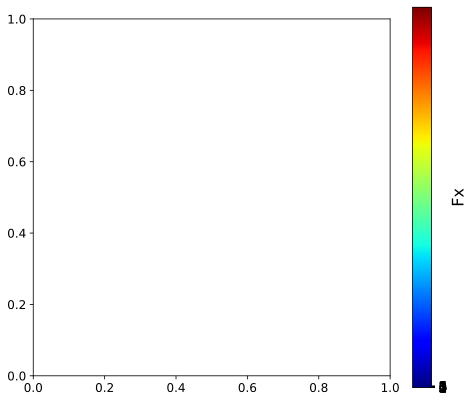

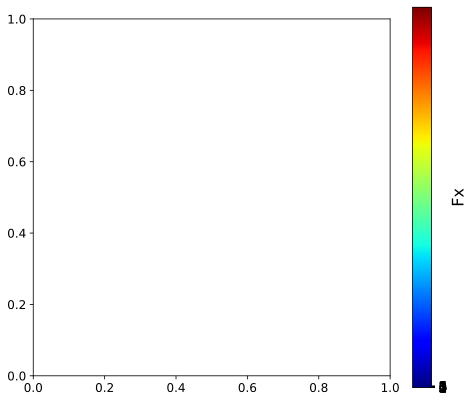

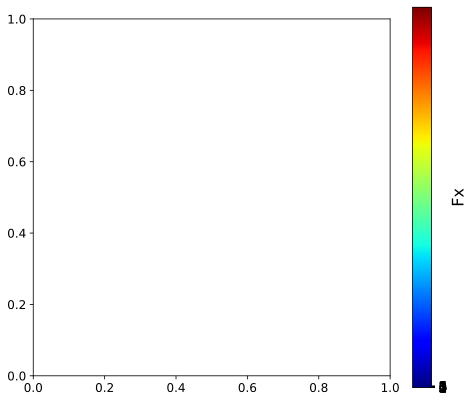

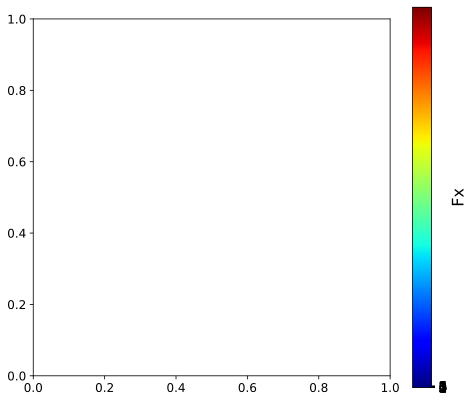

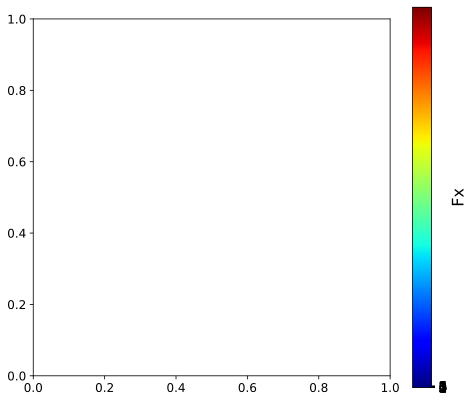

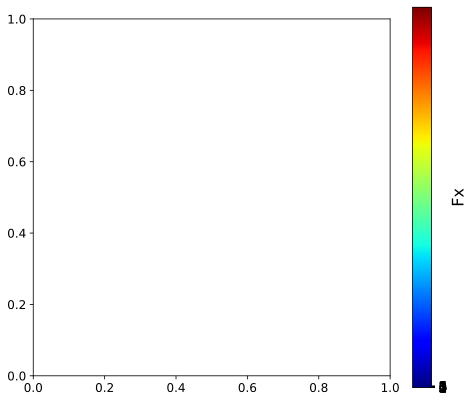

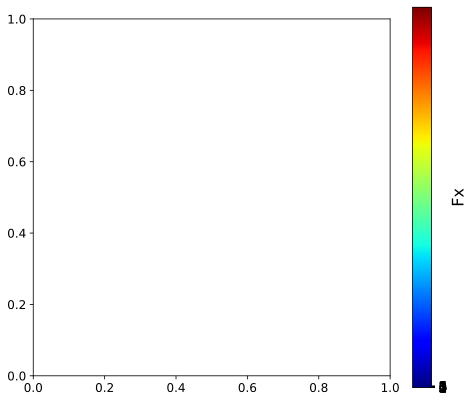

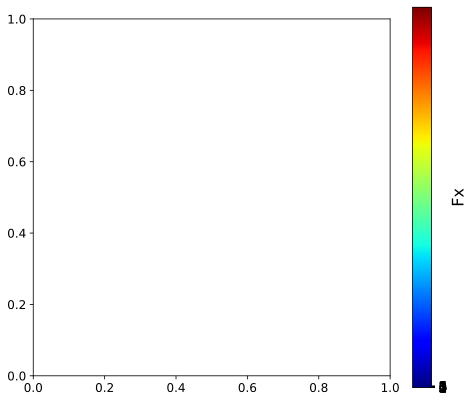

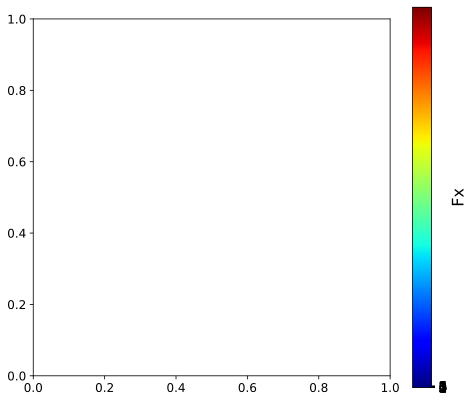

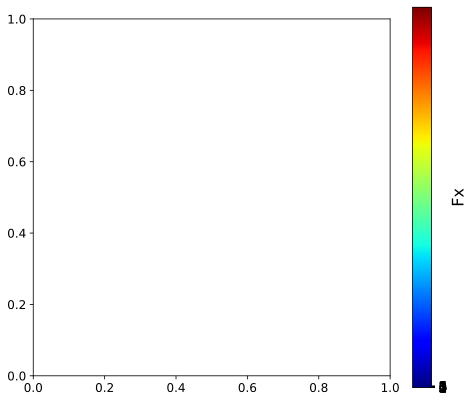

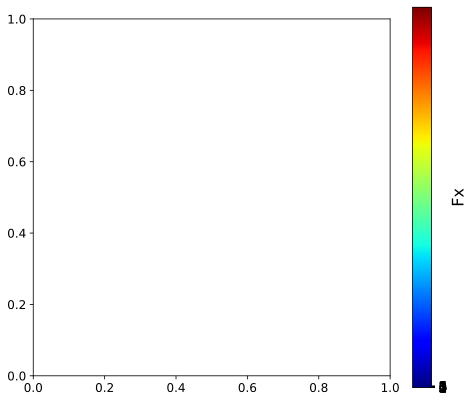

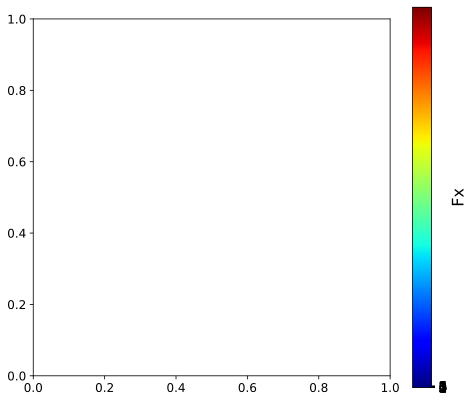

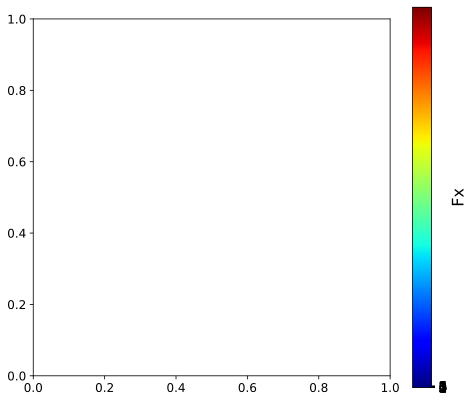

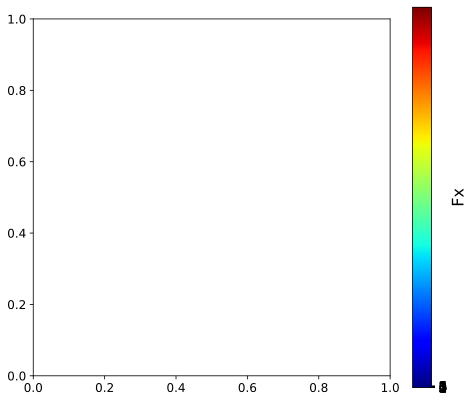

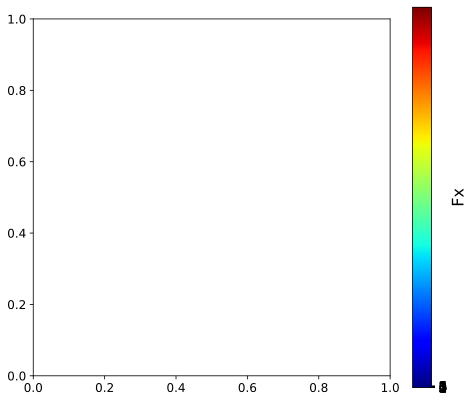

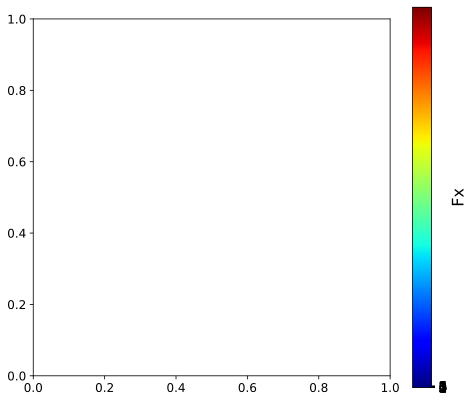

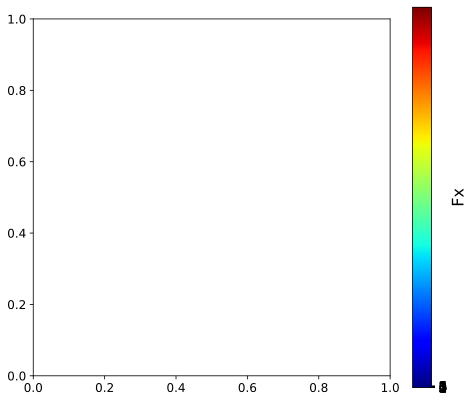

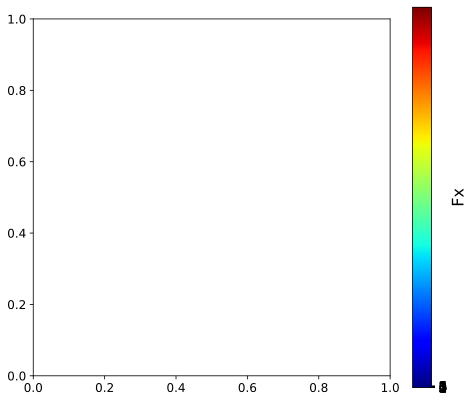

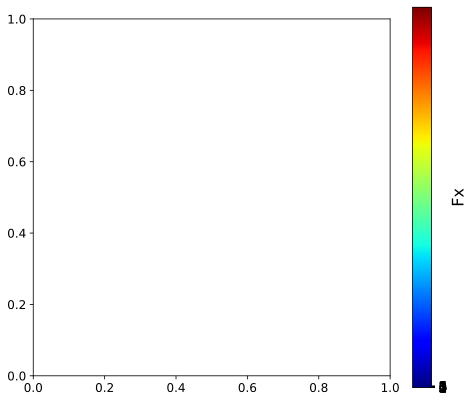

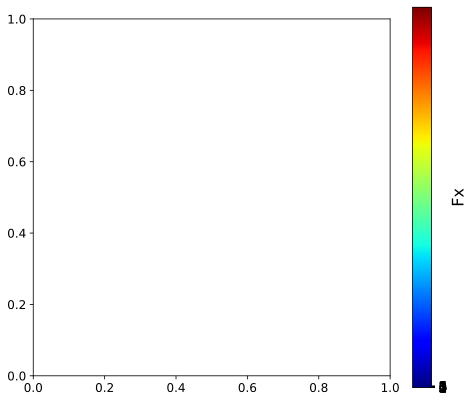

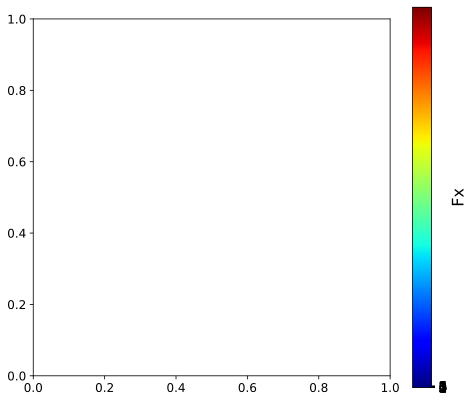

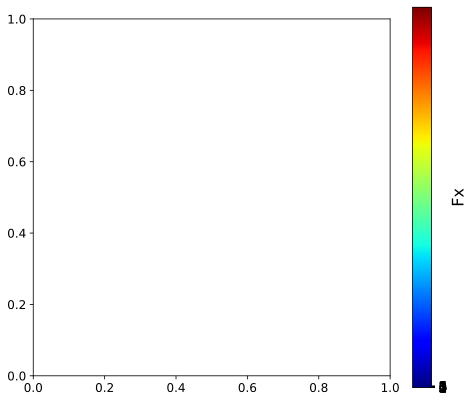

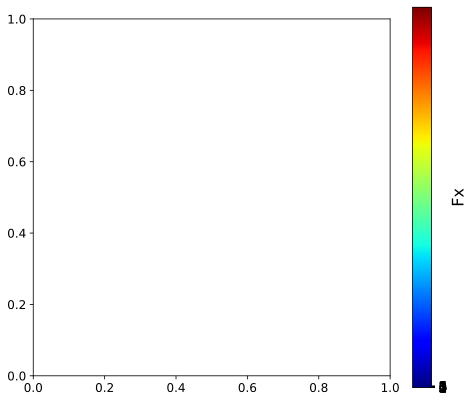

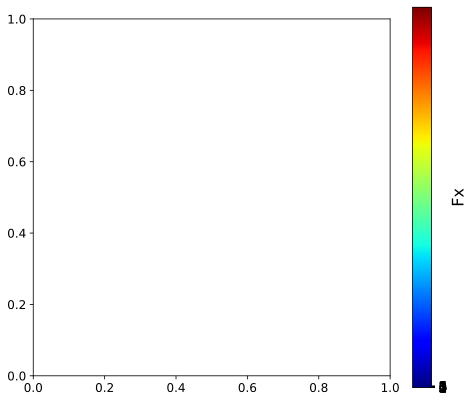

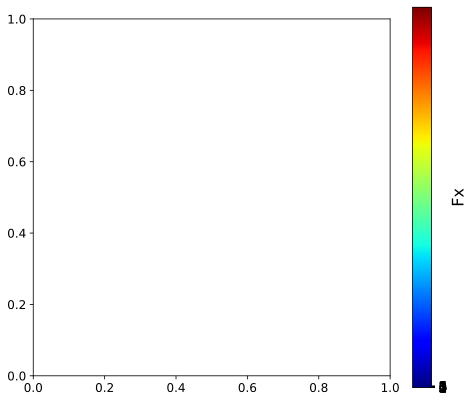

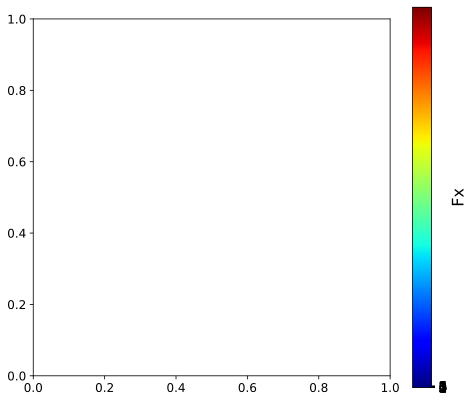

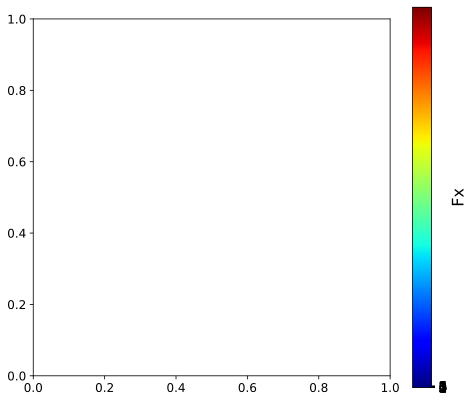

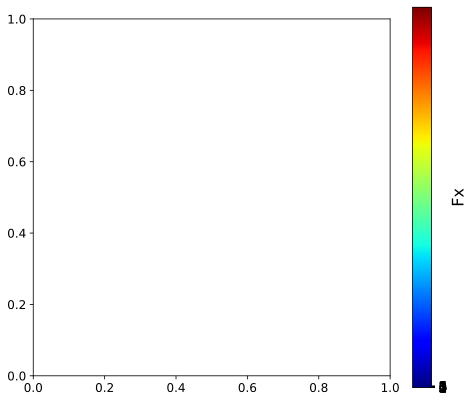

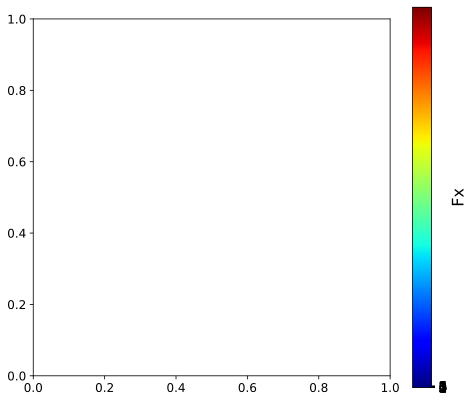

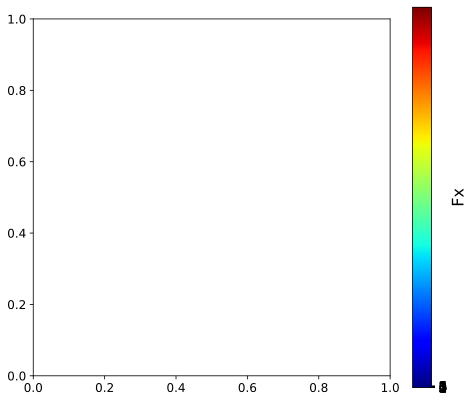

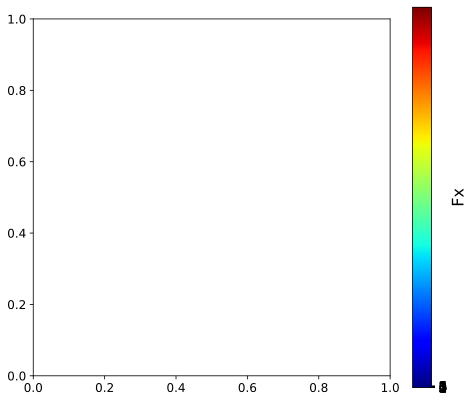

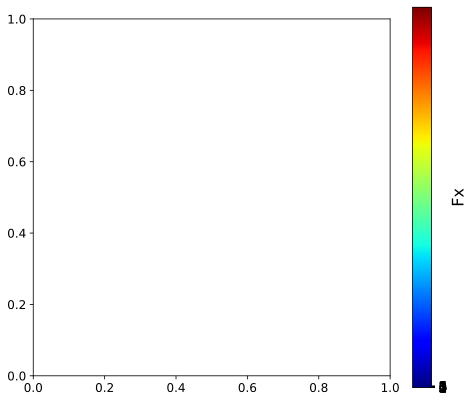

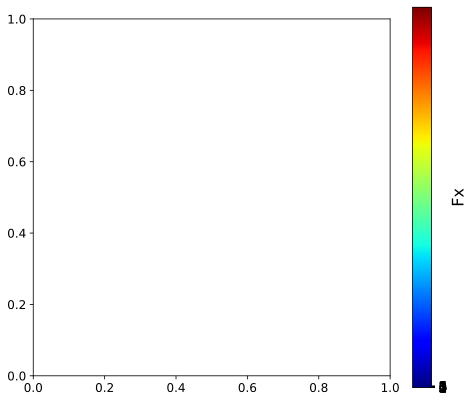

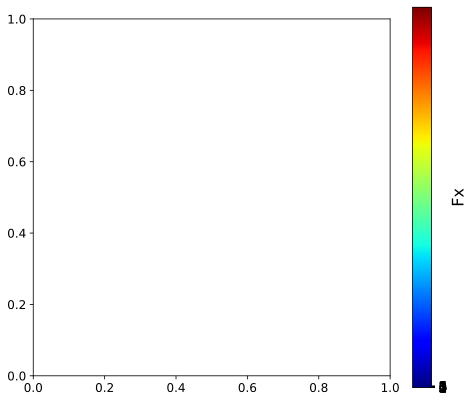

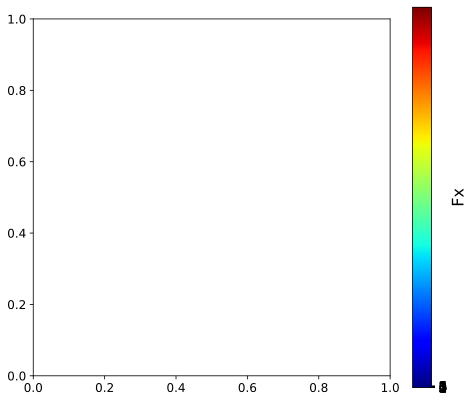

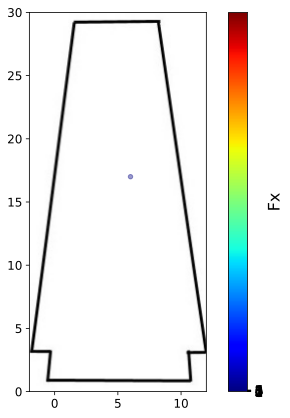

In [89]:
%matplotlib inline

some_data = data.sample(n=1,replace = True)
some_data['height'] = 17


plt.cla()

ax = some_data.plot(kind="scatter",x="p_index", y='height', figsize=(8,7),
                       c="Fx", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )


plt.imshow(finger_img, extent=[-2,12, 0, 30],
           cmap=plt.get_cmap("jet"))

plt.ylabel("p_index", fontsize=14)
plt.xlabel("contact area", fontsize=14)
prices = some_data["Fx"]
tick_values = np.linspace(0,6,10)
cbar = plt.colorbar(ticks=tick_values/6)
cbar.ax.set_yticklabels(["%d"%(round(v)) for v in tick_values], fontsize=14)
cbar.set_label('Fx', fontsize=16)



In [14]:
%matplotlib auto
import time

def bb():
    fig, ax1 = plt.subplots(1,1, figsize = (7,12))
    ax1.imshow(finger_img, extent=[-2,13, 0, 30],
               cmap=plt.get_cmap("jet"))
    ax1.set_xticks([])
    ax1.set_yticks([])

    while 1:
        if FTSensor.GetData()[1] > 0.3:

            CPosition = ur10.get_state()['TCP_Pose']
            Ax = 25 -(my_model_loaded_position_z.predict([finger.GetData()])[0])
            Ay = 25 - (0.150 - CPosition[2])/0.002

        else:

            Ax = 30
            Ay = 30 

        data_plot = [np.array(Ax),np.array(Ay)]

        plot_sensor_scatter(fig,ax1,data_plot)
        plt.ion() 

Using matplotlib backend: nbAgg


<IPython.core.display.Javascript object>


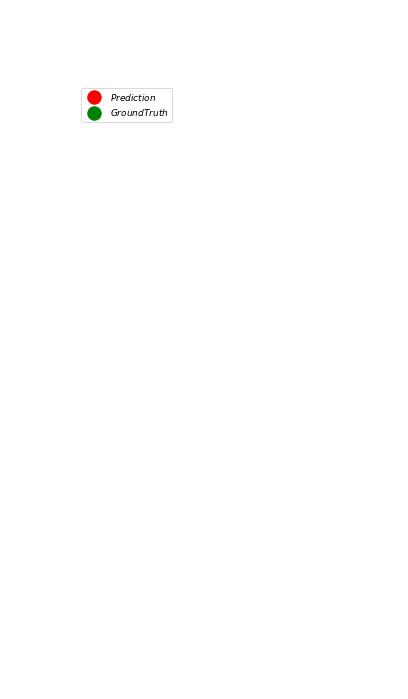

In [15]:
import _thread

try:
   _thread.start_new_thread( bb, ( ) )
   _thread.start_new_thread( move, ( ) )
except:
   print ("Error: 无法启动线程")